In [145]:
import pandas as pd

In [146]:
df = pd.read_csv(r'C:\Users\devpa\OneDrive\Desktop\Backup\Jarvis\jarvis_intents.csv')
print( df.sample(10))

                                    command           intent
141                           Launch GitHub      open_github
95               Calculator software please  open_calculator
144                  Open GitHub repository      open_github
25   Find information about space on Google    search_google
88                       Calculator program  open_calculator
143                  I want to check GitHub      open_github
162                           Start Spotify     open_spotify
76                              Run Notepad     open_notepad
0                          What time is it?         get_time
116               WhatsApp application open    open_whatsapp


In [147]:
df['intent'].value_counts()


intent
get_time           20
search_google      20
search_youtube     20
open_notepad       20
open_calculator    20
open_whatsapp      20
open_linkedin      20
open_github        20
open_spotify       20
Name: count, dtype: int64

In [148]:
df.describe()


,command,intent
count,180,180
unique,180,9
top,What time is it?,get_time
freq,1,20


In [149]:
df['intent_number'] = df['intent'].map({
    'get_time': 0,
    'search_google': 1,
    'search_youtube': 2,
    'open_notepad': 3,
    'open_calculator': 4,
    'open_whatsapp': 5,
    'open_linkedin': 6,
    'open_github': 7,
    'open_spotify': 8
})
print( df.sample(10))

                               command           intent  intent_number
174                   Bring up Spotify     open_spotify              8
37     Find nearby hospitals on Google    search_google              1
93              Open Calculator window  open_calculator              4
165                     Spotify please     open_spotify              8
24   Search Google for Jarvis projects    search_google              1
90                  Open my Calculator  open_calculator              4
60                        Open Notepad     open_notepad              3
178              Spotify software open     open_spotify              8
26               Look up weather today    search_google              1
160                       Open Spotify     open_spotify              8


In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['command'], df['intent_number'], test_size=0.2, random_state=42)



In [151]:
X_train.shape

(144,)

In [152]:
X_test.shape

(36,)

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [154]:
clf.fit(X_train, y_train)

,steps,"[('vectorizer', ...), ('nb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [155]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         2

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [156]:
test_command = ["open chrome"]
pred = clf.predict(test_command)
print("Predicted intent:", pred)


Predicted intent: [8]


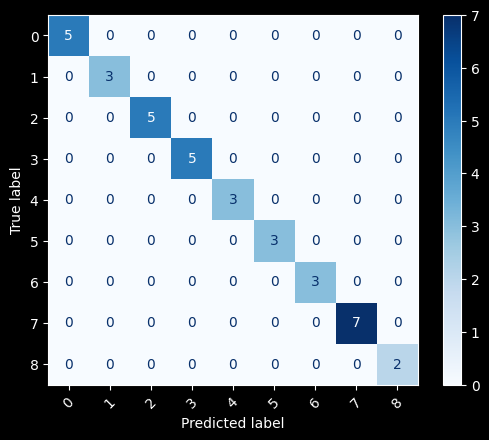

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.show()
